In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import setup


In [2]:
df = pd.read_csv('openipf-2024-08-31.csv', low_memory=False)
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,Sanctioned
0,Jade Millar,F,SBD,Raw,NaN,NaN,NaN,Junior,68.15,69,...,Australia,NaN,APLA,IPF,2024-08-04,Australia,NSW,NaN,XGYM Break All Limits Open IV,Yes
1,Jacqueline Pan,F,SBD,Raw,NaN,NaN,NaN,Junior,75.40,76,...,Australia,NaN,APLA,IPF,2024-08-04,Australia,NSW,NaN,XGYM Break All Limits Open IV,Yes
2,Ursula Pereira,F,SBD,Raw,25.5,24-34,24-39,Open,47.35,52,...,Australia,NaN,APLA,IPF,2024-08-04,Australia,NSW,NaN,XGYM Break All Limits Open IV,Yes
3,Ruth Czarnecki,F,SBD,Raw,26.0,24-34,24-39,Open,62.70,63,...,Australia,NaN,APLA,IPF,2024-08-04,Australia,NSW,NaN,XGYM Break All Limits Open IV,Yes
4,Erica Saqueton,F,SBD,Raw,NaN,NaN,NaN,Open,68.70,69,...,Australia,NaN,APLA,IPF,2024-08-04,Australia,NSW,NaN,XGYM Break All Limits Open IV,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274491 entries, 0 to 1274490
Data columns (total 42 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Name              1274491 non-null  object 
 1   Sex               1274491 non-null  object 
 2   Event             1274491 non-null  object 
 3   Equipment         1274491 non-null  object 
 4   Age               928865 non-null   float64
 5   AgeClass          972680 non-null   object 
 6   BirthYearClass    988534 non-null   object 
 7   Division          1273541 non-null  object 
 8   BodyweightKg      1259817 non-null  float64
 9   WeightClassKg     1260741 non-null  object 
 10  Squat1Kg          518540 non-null   float64
 11  Squat2Kg          513569 non-null   float64
 12  Squat3Kg          501392 non-null   float64
 13  Squat4Kg          327 non-null      float64
 14  Best3SquatKg      917866 non-null   float64
 15  Bench1Kg          729274 non-null   float64
 16  

In [4]:
df.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass',
       'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg',
       'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg',
       'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner',
       'Goodlift', 'Tested', 'Country', 'State', 'Federation',
       'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown',
       'MeetName', 'Sanctioned'],
      dtype='object')

In [5]:
# removing unecessary columns, filtering df to only include RAW SBD meets starting from 2014
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df = df[df['Equipment'] == 'Raw']
df = df[df['Event'] == 'SBD']
df = df[df['Year'] >= 2014]
df = df.drop(['Date','Wilks', 'Glossbrenner','AgeClass','BirthYearClass','State','Sanctioned','Tested','MeetState','Goodlift','Squat4Kg','Bench4Kg','Deadlift4Kg','Federation','ParentFederation','MeetTown','Event','Equipment','Dots'],axis=1)
df = df.dropna()
df_final = df[(df['Division'] == 'Junior') | (df['Division'] == 'Sub-Juniors') | (df['Division'] == 'Open')]

In [6]:
df_final.head()

,Name,Sex,Age,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Country,MeetCountry,MeetName,Year
2,Ursula Pereira,F,25.5,Open,47.35,52,117.5,-125.0,125.0,125.0,...,137.5,142.5,-147.5,142.5,330.0,1,Australia,Australia,XGYM Break All Limits Open IV,2024
3,Ruth Czarnecki,F,26.0,Open,62.70,63,110.0,117.5,125.0,125.0,...,140.0,152.5,160.0,160.0,355.0,1,Australia,Australia,XGYM Break All Limits Open IV,2024
10,Cammilla White,F,39.0,Open,83.60,84,130.0,142.5,-150.0,142.5,...,120.0,130.0,135.0,135.0,357.5,2,Australia,Australia,XGYM Break All Limits Open IV,2024
12,Lauren Deverell,F,30.5,Open,104.10,84+,175.0,187.5,195.0,195.0,...,175.0,185.0,-200.0,185.0,467.5,1,Australia,Australia,XGYM Break All Limits Open IV,2024
14,Thomas McConville,M,20.5,Junior,81.90,83,200.0,-212.5,212.5,212.5,...,240.0,255.0,270.0,270.0,620.0,1,Australia,Australia,XGYM Break All Limits Open IV,2024


In [7]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36450 entries, 2 to 1274488
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             36450 non-null  object 
 1   Sex              36450 non-null  object 
 2   Age              36450 non-null  float64
 3   Division         36450 non-null  object 
 4   BodyweightKg     36450 non-null  float64
 5   WeightClassKg    36450 non-null  object 
 6   Squat1Kg         36450 non-null  float64
 7   Squat2Kg         36450 non-null  float64
 8   Squat3Kg         36450 non-null  float64
 9   Best3SquatKg     36450 non-null  float64
 10  Bench1Kg         36450 non-null  float64
 11  Bench2Kg         36450 non-null  float64
 12  Bench3Kg         36450 non-null  float64
 13  Best3BenchKg     36450 non-null  float64
 14  Deadlift1Kg      36450 non-null  float64
 15  Deadlift2Kg      36450 non-null  float64
 16  Deadlift3Kg      36450 non-null  float64
 17  Best3DeadliftKg

In [8]:
relevant_columns = ['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg']
df_filtered = df_final[(df_final[relevant_columns] >= 0).all(axis=1)]

In [9]:
df_final.columns

Index(['Name', 'Sex', 'Age', 'Division', 'BodyweightKg', 'WeightClassKg',
       'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg', 'Bench1Kg',
       'Bench2Kg', 'Bench3Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg',
       'Deadlift3Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Country',
       'MeetCountry', 'MeetName', 'Year'],
      dtype='object')

In [23]:
df_filtered = df_filtered[['Sex','Age','Division','Best3SquatKg','Best3BenchKg','Best3DeadliftKg','TotalKg','Year']]
df_filtered

,Sex,Age,Division,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Year
2,1.0,25.5,Open,125.0,62.5,142.5,330.0,2024
3,1.0,26.0,Open,125.0,70.0,160.0,355.0,2024
10,1.0,39.0,Open,142.5,80.0,135.0,357.5,2024
12,1.0,30.5,Open,195.0,87.5,185.0,467.5,2024
14,0.0,20.5,Junior,212.5,137.5,270.0,620.0,2024
...,...,...,...,...,...,...,...,...
1274469,0.0,41.0,Open,280.0,170.0,285.0,735.0,2022
1274472,0.0,27.0,Open,215.0,167.5,255.0,637.5,2022
1274486,0.0,17.0,Sub-Juniors,177.5,120.0,215.0,512.5,2022
1274487,0.0,17.0,Sub-Juniors,212.5,112.5,230.0,555.0,2022


In [25]:
df_filtered['Sex'] = df['Sex'].map({'M': 0, 'F': 1})
df_model = pd.get_dummies(df_filtered, columns=['Division'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_4208\849462844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Sex'] = df['Sex'].map({'M': 0, 'F': 1})


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import XGBRegressor

X = df_model.drop(['Best3SquatKg','Best3BenchKg','Best3DeadliftKg'],axis=1)
y = df_model[['Best3SquatKg','Best3BenchKg','Best3DeadliftKg']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
regressor = XGBRegressor()
model = MultiOutputRegressor(regressor)
model.fit(X_train_scaled,y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))

In [42]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
print(f'Root Mean Squared Error on training set: {rmse_train}')
print(f'Root Mean Squared Error on test set: {rmse_test}')

Root Mean Squared Error on test set: 10.375755183658084
Root Mean Squared Error on test set: 11.987185220609495


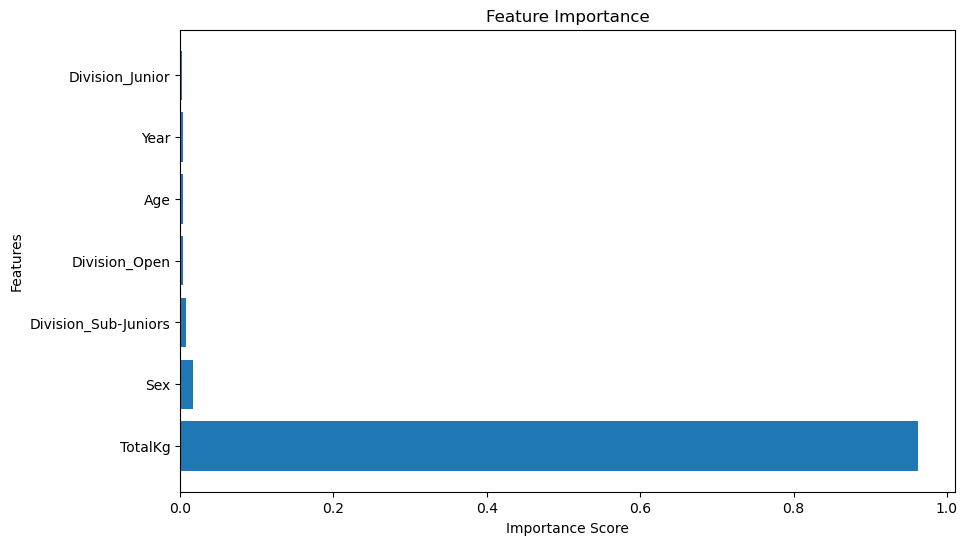

In [41]:
feature_names = X_train.columns

importances = model.estimators_[0].feature_importances_  


importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')  
plt.show()